In [48]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [49]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
titanic = pd.concat([train, test])

In [50]:
display(train.head(5))
print(train.shape)
print(train.columns.values)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [51]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [52]:
train[train.Age.isna()].Survived.value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [53]:
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pettersson, Miss. Ellen Natalia",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


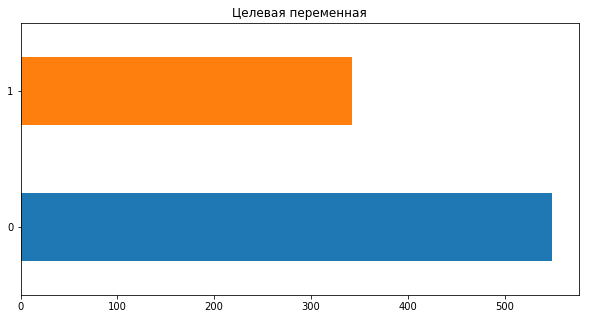

In [54]:
plt.figure(figsize=(10,5))
train['Survived'].value_counts().plot(kind='barh')
plt.title('Целевая переменная')
plt.show()

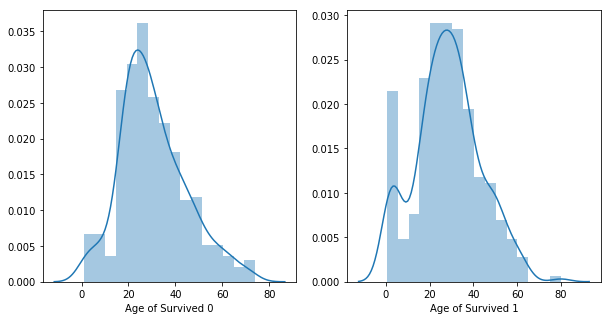

In [55]:
plt, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, i in zip(axes.flatten(), range(0, 2)):
    sns.distplot(train[train['Survived'] == i]['Age'].dropna(), ax=ax, axlabel='Age of Survived ' + str(i))

In [56]:
plt, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, j in zip(axes.flatten(), range(0, 2)):
    sns.distplot(train[train['Survived'] == j]['Pclass'].dropna(), ax=ax, axlabel='Pclass of Survived ' + str(j))

TypeError: subplots() got an unexpected keyword argument 'figsize'

In [57]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
print('Размерность набора данных до удаления: {}'.format(train.shape))

train.drop(columns=['Ticket'], inplace=True)
test.drop(columns=['Ticket'], inplace=True)
titanic.drop(columns=['Ticket'], inplace=True)


print('Размерность набора данных после удаления: {}'.format(train.shape))

Размерность набора данных до удаления: (891, 12)
Размерность набора данных после удаления: (891, 11)


In [59]:
test[test['Cabin'].isnull()==True].shape[0]
test["Cabin"].value_counts()
train[train['Cabin'].isnull()==True].shape[0]
train["Cabin"].value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
F33                3
E101               3
C22 C26            3
D                  3
F2                 3
C125               2
C68                2
E24                2
B57 B59 B63 B66    2
B28                2
C78                2
C126               2
B58 B60            2
C2                 2
F4                 2
B49                2
E67                2
B18                2
E44                2
D26                2
F G73              2
D35                2
D17                2
C92                2
D33                2
C52                2
C83                2
                  ..
C111               1
C128               1
B101               1
D50                1
D37                1
C104               1
A7                 1
E12                1
B73                1
D28                1
E10                1
E49                1
A20                1
E50                1
B79                1
C45                1
B50          

In [60]:
cabins_train = train[["Cabin"]].copy()
cabins_test = test[["Cabin"]].copy()
cabins_train["Cabin_Data"] = cabins_train["Cabin"].isnull().apply(lambda x: not x)
cabins_train["Deck"] = cabins_train["Cabin"].str.slice(0,1)
cabins_train["Room"] = cabins_train["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")

cabins_test["Cabin_Data"] = cabins_test["Cabin"].isnull().apply(lambda x: not x)
cabins_test["Deck"] = cabins_test["Cabin"].str.slice(0,1)
cabins_test["Room"] = cabins_test["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")




In [61]:
cabins_test.drop(["Cabin_Data", "Cabin"], axis = 1, inplace = True, errors = "ignore")
cabins_train.drop(["Cabin_Data", "Cabin"], axis = 1, inplace = True, errors = "ignore")

In [62]:
cabins_test["Deck"] = cabins_test["Deck"].fillna("N")
cabins_test["Room"] = cabins_test["Room"].fillna(cabins_test["Room"].mean())
cabins_train["Deck"] = cabins_train["Deck"].fillna("N")
cabins_train["Room"] = cabins_train["Room"].fillna(cabins_train["Room"].mean())

In [63]:
def one_hot_column(df, label, drop_col=False):
    one_hot = pd.get_dummies(df[label], prefix=label)
    if drop_col:
        df = df.drop(label, axis=1)
    df = df.join(one_hot)
    return df


def one_hot(df, labels, drop_col=False):
    for label in labels:
        df = one_hot_column(df, label, drop_col)
    return df

In [64]:
cabins_train = one_hot(cabins_train, ["Deck"], drop_col=True)
cabins_test = one_hot(cabins_test, ["Deck"], drop_col=True)

In [65]:
pd.concat([train, cabins_train], axis = 1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,...,Room,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,...,50.49,0,0,0,0,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,...,85.00,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,...,50.49,0,0,0,0,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,...,123.00,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,...,50.49,0,0,0,0,0,0,0,1,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,...,50.49,0,0,0,0,0,0,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,...,46.00,0,0,0,0,1,0,0,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,...,50.49,0,0,0,0,0,0,0,1,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,...,50.49,0,0,0,0,0,0,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,...,50.49,0,0,0,0,0,0,0,1,0


In [66]:
pd.concat([test, cabins_test], axis = 1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Room,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,47.651685,0,0,0,0,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,47.651685,0,0,0,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q,47.651685,0,0,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S,47.651685,0,0,0,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S,47.651685,0,0,0,0,0,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,9.2250,NaN,S,47.651685,0,0,0,0,0,0,0,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,NaN,Q,47.651685,0,0,0,0,0,0,0,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,29.0000,NaN,S,47.651685,0,0,0,0,0,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,NaN,C,47.651685,0,0,0,0,0,0,0,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,24.1500,NaN,S,47.651685,0,0,0,0,0,0,0,1


In [67]:
train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).unique()
train['title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [68]:
train['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Ms            1
Sir           1
Countess      1
Don           1
Lady          1
Capt          1
Jonkheer      1
Name: title, dtype: int64

In [69]:
for dataset in [train, test]:
    dataset['title'] = dataset['title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')

In [70]:
train[['title', 'Survived']].groupby(['title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [71]:
for dataset in [train, test]:
    dataset['title'] = dataset['title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}).fillna(0)
    
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1


In [72]:
print('Размерность набора данных до удаления: {}'.format(train.shape))

for dataset in [train, test]:
    dataset.drop(columns=['Name', 'PassengerId'], inplace=True)
    
print('Размерность набора данных после удаления: {}'.format(train.shape))

Размерность набора данных до удаления: (891, 12)
Размерность набора данных после удаления: (891, 10)


In [73]:
for dataset in [train, test]:
    dataset['Sex'] = dataset['Sex'].map({'male': 1, 'female': 0})

In [74]:
for dataset in [train, test]:
    dataset['Age'] =  dataset['Age'].fillna(np.median(dataset['Age'].median()))

In [75]:
for dataset in [train, test]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [76]:
for dataset in [train, test]:
    dataset['Alone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'Alone'] = 1

In [77]:
train = train.drop(['Parch', 'SibSp', 'FamilySize', 'Cabin'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize', 'Cabin'], axis=1)
print('Размерность набора данных после удаления: {}'.format(train.shape))

Размерность набора данных после удаления: (891, 8)


In [78]:
for dataset in [train, test]:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
for dataset in [train, test]:    
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype('int')

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True)
plt.show()

TypeError: 'NoneType' object is not callable

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [81]:
y = train['Survived']
X = train.drop(columns=['Survived'])
X_test = test

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [85]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

pred = logreg.predict(X_val)
accuracy_score(y_val, pred)

0.8212290502793296